## DataRobot Python API Training

Notebook #1 - Exercise 1 - Feature Selection Curves

raul.arrabales@datarobot.com

**Data Sets**

In [2]:
url_to_data = "https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv" 
url_to_scoring_data = 'https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes_scoring.csv'

**Libraries**

In [4]:
import datarobot as dr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Connect to DataRobot**

In [6]:
credentials_File = 'drconfig.yaml'

dr.Client(config_path=credentials_File)

**Create Project**
- Use the data variable as input.
- Set readmitted as the target.
- Start the project using explicitly the quick autopilot in the mode variable.
- Use AUC as the optimisation metric.
- Set worker_count variable to -1.
- Wait for Autopilot to complete.

In [10]:
project = dr.Project.create(sourcedata = url_to_data,
                            project_name='21Oct2021_RAM_PyAPI_01_FeatSelectionCurves')

In [11]:
project.set_target(target = 'readmitted',
                   metric = 'AUC',
                   mode=dr.AUTOPILOT_MODE.QUICK,
                   worker_count = -1)

Project(21Oct2021_RAM_PyAPI_01_FeatSelectionCurves)

In [13]:
project.wait_for_autopilot()

In progress: 12, queued: 0 (waited: 0s)
In progress: 11, queued: 0 (waited: 2s)
In progress: 11, queued: 0 (waited: 4s)
In progress: 11, queued: 0 (waited: 5s)
In progress: 11, queued: 0 (waited: 8s)
In progress: 11, queued: 0 (waited: 11s)
In progress: 9, queued: 0 (waited: 15s)
In progress: 8, queued: 0 (waited: 23s)
In progress: 7, queued: 0 (waited: 37s)
In progress: 4, queued: 0 (waited: 59s)
In progress: 3, queued: 0 (waited: 81s)
In progress: 2, queued: 0 (waited: 102s)
In progress: 1, queued: 0 (waited: 124s)
In progress: 0, queued: 0 (waited: 145s)
In progress: 7, queued: 0 (waited: 166s)
In progress: 7, queued: 0 (waited: 188s)
In progress: 7, queued: 0 (waited: 209s)
In progress: 6, queued: 0 (waited: 231s)
In progress: 3, queued: 0 (waited: 253s)
In progress: 0, queued: 0 (waited: 275s)
In progress: 16, queued: 0 (waited: 296s)
In progress: 13, queued: 0 (waited: 319s)
In progress: 3, queued: 0 (waited: 341s)
In progress: 1, queued: 0 (waited: 362s)
In progress: 1, queued: 

**Create Custom Feature Lists**
- Retrieve Feature Impact for the most accurate model by the validation score
- Create 3 different Feature Lists named top_5, top_10 and top_15. 
- Each feature list will have the respective top n features based on Feature Impact score.

In [14]:
# Get most accurate model
most_accurate_model = project.get_models()[0]

# Get Feature Impact
feature_impact = most_accurate_model.get_or_request_feature_impact()

In [15]:
# Current feature lists:
project.get_featurelists()

[Featurelist(Raw Features),
 Featurelist(Informative Features),
 Featurelist(Univariate Selections),
 Featurelist(DR Reduced Features M21)]

In [16]:
len(feature_impact)

39

In [25]:
for feat in feature_impact[0:5]:
    print(feat.get('featureName') + " --> " + str(feat.get('impactNormalized')))

discharge_disposition_id --> 1.0
medical_specialty --> 0.6397351319048539
number_inpatient --> 0.5826196419940968
admission_source_id --> 0.3059319723661155
num_lab_procedures --> 0.2886037016257656


In [27]:
[feat.get('featureName') for feat in feature_impact[0:5]]

['discharge_disposition_id',
 'medical_specialty',
 'number_inpatient',
 'admission_source_id',
 'num_lab_procedures']

In [28]:
# Create new feat lists
top_5_feats = project.create_featurelist('Top5_Feats', 
                                         features = [feat.get('featureName') for feat in feature_impact[0:5]]) 

In [31]:
top_10_feats = project.create_featurelist('Top10_Feats', 
                                         features = [feat.get('featureName') for feat in feature_impact[0:10]])

In [32]:
top_15_feats = project.create_featurelist('Top15_Feats', 
                                         features = [feat.get('featureName') for feat in feature_impact[0:15]])

In [33]:
# Current feature lists:
project.get_featurelists()

[Featurelist(Raw Features),
 Featurelist(Informative Features),
 Featurelist(Univariate Selections),
 Featurelist(DR Reduced Features M21),
 Featurelist(Top5_Feats),
 Featurelist(Top10_Feats),
 Featurelist(Top15_Feats)]

**Identify Specific Models**
- Model's model_type is in ['Light Gradient', 'eXtreme Gradient', 'Elastic-Net'].
- Model's sample_pct equals 64% (The amount of data the model has been trained on).

In [38]:
models_LG = project.get_models(search_params={
                'name': "Light Gradient",
                })

models_XG = project.get_models(search_params={
                'name': "eXtreme Gradient",
                })

models_EN = project.get_models(search_params={
                'name': "Elastic-Net",
                })

In [39]:
models_3types = models_LG + models_XG + models_EN

In [40]:
models_3types

[Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosting on ElasticNet Predictions '),
 Model('Light Gradient Boosting on ElasticNet Predictions '),
 Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('eXtreme Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (L2 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (L2 / Binomial Deviance)')]

In [44]:
models_64 = project.get_models(search_params={
                'sample_pct': 64,
                })

In [45]:
models_64

[Model('AVG Blender'),
 Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosting on ElasticNet Predictions '),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (L2 / Binomial Deviance)'),
 Model('Auto-Tuned Word N-Gram Text Modeler using token occurrences - diag_1_desc'),
 Model('Auto-Tuned Word N-Gram Text Modeler using token occurrences - diag_2_desc'),
 Model('Auto-Tuned Word N-Gram Text Modeler using token occurrences - diag_3_desc')]

In [69]:
models_64[0].
    


<bound method Model.get_parameters of Model('AVG Blender')>

In [65]:
for model in models_64:
    print(model.model_category)

blend
model
model
model
model
model
model
model
model


**Retrain models on the custom feature lists**
- Retrain the models with the top_5, top_10, top_15 feature lists and 64% of the data.

In [71]:
for model in models_64:
    if model.model_category != 'blend':
        for featList in [top_5_feats, top_10_feats, top_15_feats]:
            res = model.retrain(sample_pct = 64, featurelist_id = featList.id)
            print("Training model: " + str(res))

Training model: ModelJob(Light Gradient Boosted Trees Classifier with Early Stopping, status=COMPLETED)
Training model: ModelJob(Light Gradient Boosted Trees Classifier with Early Stopping, status=inprogress)
Training model: ModelJob(Light Gradient Boosted Trees Classifier with Early Stopping, status=queue)
Training model: ModelJob(Light Gradient Boosted Trees Classifier with Early Stopping, status=COMPLETED)
Training model: ModelJob(Light Gradient Boosted Trees Classifier with Early Stopping, status=inprogress)
Training model: ModelJob(Light Gradient Boosted Trees Classifier with Early Stopping, status=inprogress)
Training model: ModelJob(Light Gradient Boosting on ElasticNet Predictions , status=inprogress)
Training model: ModelJob(Light Gradient Boosting on ElasticNet Predictions , status=inprogress)
Training model: ModelJob(Light Gradient Boosting on ElasticNet Predictions , status=queue)
Training model: ModelJob(Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance), status

ClientError: 422 client error: {'message': 'Model 61717b071c0a78984b9e86f3 can not be retrained with featurelist 61718477e294229c6cc08f96'}

**Plot performance based on the different feature lists**
- Create a list with all of the models retrained on top_5, top_10, and top 15 feature lists.
- Find the average value of the cross-validation score based on AUC for the retrained models and plot that.

In [82]:
models_w_top5 = []
models_w_top10 = []
models_w_top15 = []       

In [125]:
new_models = project.get_models(search_params={
                'sample_pct': "64"})

In [127]:
for model in new_models:
    print(model.featurelist_name)
    if model.featurelist_name == 'Top5_Feats':
        models_w_top5.append(model)
    if model.featurelist_name == 'Top10_Feats':
        models_w_top10.append(model)
    if model.featurelist_name == 'Top15_Feats':
        models_w_top15.append(model) 

None
DR Reduced Features M21
Informative Features
Top15_Feats
Informative Features
Top10_Feats
Top15_Feats
Informative Features
Informative Features
Top15_Feats
Top15_Feats
Top10_Feats
Top10_Feats
Top10_Feats
Top5_Feats
Top5_Feats
Top5_Feats
Top5_Feats
Informative Features
Informative Features
Informative Features


In [128]:
for model in new_models:
    try:
        model.cross_validate()
    except:
        pass

In [129]:
import time

#Wait for calculations to finish
while len(project.get_all_jobs()) > 0:
    time.sleep(5)
    print(".")

In [130]:
retrained_models = project.get_models(search_params={
                'sample_pct': "64"})

In [131]:
for model in retrained_models:
    print(model.featurelist_name)
    if model.featurelist_name == 'top5_Feats':
        models_w_top5.add(model)
    if model.featurelist_name == 'top10_Feats':
        models_w_top10.add(model)
    if model.featurelist_name == 'top15_Feats':
        models_w_top15.add(model) 

None
DR Reduced Features M21
Informative Features
Top15_Feats
Informative Features
Top10_Feats
Top15_Feats
Informative Features
Informative Features
Top15_Feats
Top15_Feats
Top10_Feats
Top10_Feats
Top10_Feats
Top5_Feats
Top5_Feats
Top5_Feats
Top5_Feats
Informative Features
Informative Features
Informative Features


In [132]:
#Empty lists to hold results
top_5_cv_scores = []
top_10_cv_scores = []
top_15_cv_scores = []

for model in retrained_models:
    if model.featurelist_name == 'Top5_Feats':
        top_5_cv_scores.append(model.metrics['AUC']['crossValidation'])
    elif model.featurelist_name == 'Top10_Feats':
        top_10_cv_scores.append(model.metrics['AUC']['crossValidation'])
    else:
        top_15_cv_scores.append(model.metrics['AUC']['crossValidation'])

In [133]:
top_5_cv_scores

[0.704482,
 0.701064,
 0.702508,
 0.699572,
 0.6999259999999999,
 0.694308,
 0.6952619999999999,
 0.6956979999999999,
 0.69185,
 0.693472,
 0.560452,
 0.5579080000000001,
 0.555132]

In [136]:
top_10_cv_scores

[0.68963, 0.689306, 0.6862579999999999, 0.683848]

In [137]:
top_15_cv_scores

[0.704482,
 0.701064,
 0.702508,
 0.699572,
 0.6999259999999999,
 0.694308,
 0.6952619999999999,
 0.6956979999999999,
 0.69185,
 0.693472,
 0.560452,
 0.5579080000000001,
 0.555132]

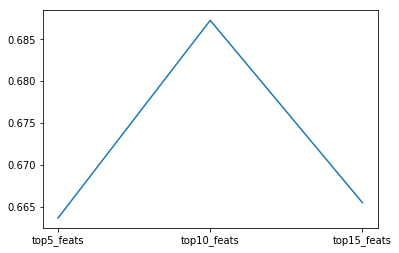

In [134]:
from statistics import mean 
import matplotlib.pyplot as plt

values = [mean(top_5_cv_scores), mean(top_10_cv_scores), mean(top_15_cv_scores)]
names = ['top5_feats', 'top10_feats', 'top15_feats']

plt.plot(names,values)

In [135]:
values

[0.6636755000000001, 0.6872604999999999, 0.6655103076923077]